Predicting Churn for Bank Customers (Group 10)
Problem statement:
https://bits-pilani.instructure.com/courses/573/assignments/2976

Group 10 - Memebers:
2019AC04037 : Anoop Monish CH
2019AC04020 : Srejith Ramesh
2019AC04014 : Shreyas

## Import Libraries 

For this assignment , We are using basic Python data science libraries. Following are the package specfication with their version numbers. 


| Package    | Description                                                                                                                | Version      |
|------------|----------------------------------------------------------------------------------------------------------------------------|--------------|
| Pandas     | Used for Data preprocessing and manipulation                                                                               | 1.1.2        |
| Numpy      | Used for numeric calculations of the data                                                                                  | 1.18.5       |
| Sklearn    | Used for creating models and encoding/feature scaling of data                                                              | 0.22.2.post1 |
| Statsmodel | Used for creation of Logistic Regression (OLS model) for P-value calculations and Statistical summaries                    | 0.10.2       |
| Matplotlib | Used for plot creation and visualization (This library is imported within Pandas , Since we're using Pandas plot functions | 3.2.2        |

In [ ]:
# Basic Imports
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2
from numpy import set_printoptions
from sklearn import metrics
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Max rows to display
pd.options.display.max_rows = 15

# Print plots inline
%matplotlib inline

In [ ]:
url = 'https://raw.githubusercontent.com/Srejith/liver_diseaese/main/liver_disease_1.csv'
raw_data = pd.read_csv(url)

In [ ]:
# Summary of Dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Total_Bilirubin             583 non-null    float64
 2   Direct_Bilirubin            583 non-null    float64
 3   Alkaline_Phosphotase        583 non-null    int64  
 4   Alamine_Aminotransferase    583 non-null    int64  
 5   Aspartate_Aminotransferase  583 non-null    int64  
 6   Total_Protiens              583 non-null    float64
 7   Albumin                     583 non-null    float64
 8   Albumin_and_Globulin_Ratio  579 non-null    float64
 9   Dataset                     583 non-null    object 
dtypes: float64(5), int64(4), object(1)
memory usage: 45.7+ KB


In [ ]:
raw_data.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,Yes
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,Yes
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,Yes
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,Yes


# DATA CLEANING

**Null value - Handling**

In [ ]:
((raw_data.shape[0] - raw_data.isnull().sum())/raw_data.shape[0]).to_frame(name = 'Coverage (%)') * 100

,Coverage (%)
Age,100.000000
Total_Bilirubin,100.000000
Direct_Bilirubin,100.000000
Alkaline_Phosphotase,100.000000
Alamine_Aminotransferase,100.000000
Aspartate_Aminotransferase,100.000000
Total_Protiens,100.000000
Albumin,100.000000
Albumin_and_Globulin_Ratio,99.313894
Dataset,100.000000


From the above we understand there is null values for albumin_and_globulin_ration. We need to perform null value handling for this. 

In [ ]:
albumin_null = pd.isnull(raw_data["Albumin_and_Globulin_Ratio"]) 

In [ ]:
raw_data[albumin_null]

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,0.9,0.3,189,23,33,6.6,3.9,NaN,Yes
241,51,0.8,0.2,230,24,46,6.5,3.1,NaN,Yes
253,35,0.6,0.2,180,12,15,5.2,2.7,NaN,No
312,27,1.3,0.6,106,25,54,8.5,4.8,NaN,No


In [ ]:
raw_data["Albumin_and_Globulin_Ratio"].fillna((raw_data["Albumin_and_Globulin_Ratio"].mean()), inplace=True)

In [ ]:
albumin_null = pd.isnull(raw_data["Albumin_and_Globulin_Ratio"]) 

In [ ]:
raw_data[albumin_null]

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset


All the null values have been replaced with the mean of the rest of the ratio values 

**Data Cleaning - Duplicates**

In [ ]:

raw_data = raw_data.drop_duplicates()
print( raw_data.shape )

(570, 10)


13 duplicates were removed

In [ ]:
X= StandardScaler().fit(x_columns).transform(x_columns)
X[0:5]

array([[ 1.242, -0.419, -0.494, -0.427, -0.351, -0.314,  0.279,  0.19 ,
        -0.151],
       [ 1.057,  1.21 ,  1.414,  1.662, -0.087, -0.032,  0.923,  0.064,
        -0.654],
       [ 1.057,  0.635,  0.919,  0.809, -0.109, -0.142,  0.463,  0.19 ,
        -0.182],
       [ 0.81 , -0.371, -0.388, -0.448, -0.363, -0.308,  0.279,  0.315,
         0.163],
       [ 1.673,  0.092,  0.177, -0.395, -0.291, -0.173,  0.739, -0.941,
        -1.722]])

# Exploratory Data Analysis

In [ ]:
x_columns = raw_data.iloc[:,0:9]  #independent columns
y_columns = raw_data.iloc[:,-1]    #target column i.e price range

In [ ]:
raw_data['Dataset'].value_counts()

Yes    406
No     164
Name: Dataset, dtype: int64

In [ ]:
raw_data.describe().T.apply(lambda s: s.apply(lambda x: format(x, 'g')))

,count,mean,std,min,25%,50%,75%,max
Age,570,44.8491,16.2422,4,33,45,58,90
Total_Bilirubin,570,3.32175,6.26794,0.4,0.8,1,2.6,75
Direct_Bilirubin,570,1.49754,2.83323,0.1,0.2,0.3,1.3,19.7
Alkaline_Phosphotase,570,291.751,245.292,63,176,208,298,2110
Alamine_Aminotransferase,570,79.7281,181.472,10,23,35,60,2000
Aspartate_Aminotransferase,570,109.381,290.881,10,25,41,86.75,4929
Total_Protiens,570,6.49632,1.0883,2.7,5.8,6.6,7.2,9.6
Albumin,570,3.14895,0.796813,0.9,2.6,3.1,3.8,5.5
Albumin_and_Globulin_Ratio,570,0.947997,0.31851,0.3,0.7,0.947064,1.1,2.8


Inferences: 
1. Age looks correct since the mean is 45 with min and max as 4, 90 which indicates there are no outliers.
2. We can check the boxplot of Total_Bilirubin, Alkaline_Phosphotase, Alamine_Aminotransferase, Aspartate_Aminotransferase for outliers, since the mean value and max value seem to be very far. 



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


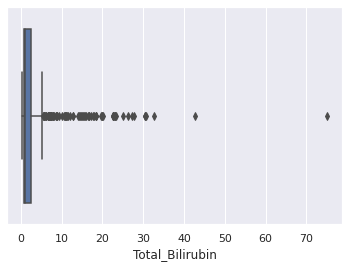

In [ ]:
sns.boxplot(raw_data.Total_Bilirubin)

In [ ]:

raw_data.Total_Bilirubin.sort_values(ascending=False).head()

166    75.0
559    42.8
505    32.6
531    30.8
259    30.5
Name: Total_Bilirubin, dtype: float64

In [ ]:
raw_data = raw_data[raw_data.Total_Bilirubin <=50 ]
raw_data.shape

(569, 10)

Removed one outlier

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


233    2110
128    1896
429    1750
116    1630
77     1620
Name: Alkaline_Phosphotase, dtype: int64

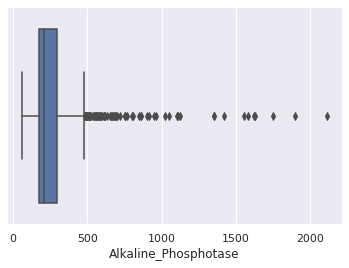

In [ ]:
sns.boxplot(raw_data.Alkaline_Phosphotase)
raw_data.Alkaline_Phosphotase.sort_values(ascending=False).head()

This data does not have outliers


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


117    2000
27     1680
47     1630
118    1350
119    1250
Name: Alamine_Aminotransferase, dtype: int64

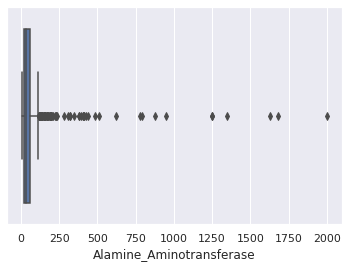

In [ ]:
sns.boxplot(raw_data.Alamine_Aminotransferase)
raw_data.Alamine_Aminotransferase.sort_values(ascending=False).head()

This data also does not have outliers


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


135    4929
117    2946
118    1600
207    1500
199    1050
Name: Aspartate_Aminotransferase, dtype: int64

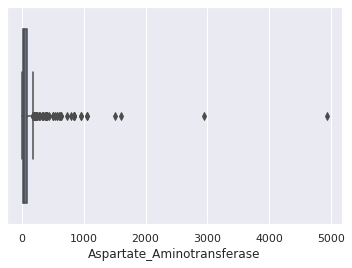

In [ ]:
sns.boxplot(raw_data.Aspartate_Aminotransferase)
raw_data.Aspartate_Aminotransferase.sort_values(ascending=False).head()

Data above 2000 can be treated as outlier


In [ ]:
raw_data = raw_data[raw_data.Aspartate_Aminotransferase <=2000 ]
raw_data.shape

(567, 10)

2 outliers removed


# **Correlation Analysis**

In [ ]:
raw_data.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
Age,1.000000,-0.002230,0.005252,0.074211,-0.097725,-0.069720,-0.199448,-0.268871,-0.210991
Total_Bilirubin,-0.002230,1.000000,0.979571,0.227140,0.239857,0.345021,-0.002525,-0.236295,-0.213064
Direct_Bilirubin,0.005252,0.979571,1.000000,0.230428,0.223878,0.319713,0.000446,-0.229246,-0.201327
Alkaline_Phosphotase,0.074211,0.227140,0.230428,1.000000,0.113957,0.131314,-0.033550,-0.164296,-0.229860
Alamine_Aminotransferase,-0.097725,0.239857,0.223878,0.113957,1.000000,0.836077,-0.031534,-0.024718,-0.013491
Aspartate_Aminotransferase,-0.069720,0.345021,0.319713,0.131314,0.836077,1.000000,-0.038943,-0.103763,-0.086818
Total_Protiens,-0.199448,-0.002525,0.000446,-0.033550,-0.031534,-0.038943,1.000000,0.787015,0.236704
Albumin,-0.268871,-0.236295,-0.229246,-0.164296,-0.024718,-0.103763,0.787015,1.000000,0.683420
Albumin_and_Globulin_Ratio,-0.210991,-0.213064,-0.201327,-0.229860,-0.013491,-0.086818,0.236704,0.683420,1.000000


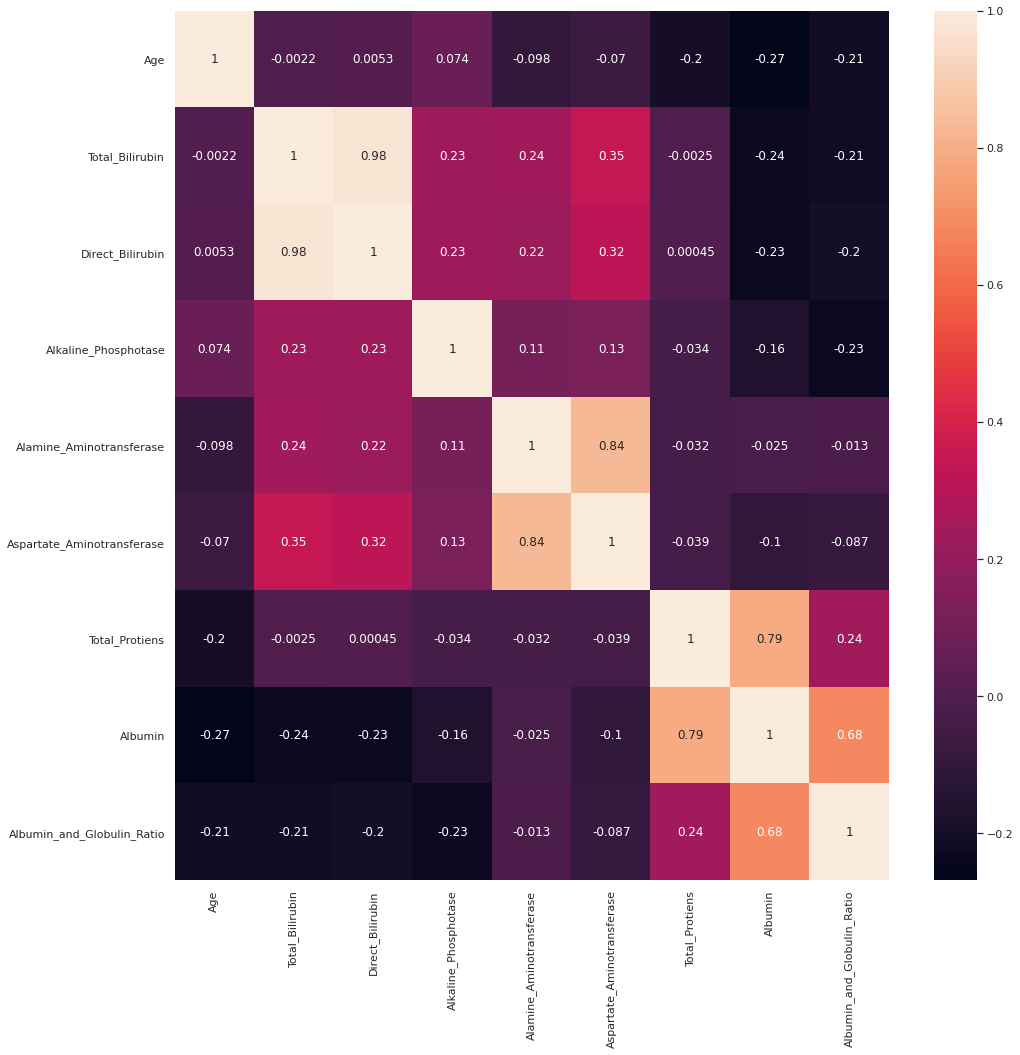

In [ ]:
sns.set(rc={'figure.figsize':(16,16)})
sns.heatmap(raw_data.corr(), annot=True)


Result: There is a strong linear co-relation between Total_Billirubin and Direct_Billirubin. So, it is enough to choose any one of this. This can be decided based on Feature Selection.


# **Feature Selection**

In [ ]:
selector = SelectKBest(chi2, k=9)
fit = selector.fit(x_columns, y_columns)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_columns.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(9,'Score'))

                        Specs         Score
5  Aspartate_Aminotransferase  10049.260383
4    Alamine_Aminotransferase   6161.766880
3        Alkaline_Phosphotase   4128.059518
1             Total_Bilirubin    338.965314
2            Direct_Bilirubin    191.641162
0                         Age     63.825103
7                     Albumin      3.193261
8  Albumin_and_Globulin_Ratio      1.770587
6              Total_Protiens      0.148182


We choose the features = Aspartate_Aminotransferase  , Alamine_Aminotransferase , Alkaline_Phosphotase   , Total_Bilirubin    , Direct_Bilirubin    , Age


Since, we inferred from Correlation Analysis that Total_Bilirubin and Direct_Bilirubin are strongly correlated, we ignore Direct_Bilirubin here. 

**Final Feature List** - Aspartate_Aminotransferase , Alamine_Aminotransferase , Alkaline_Phosphotase , Total_Bilirubin , Age

# **Machine Learning Models**


In [ ]:
# Create separate object for target variable
y = raw_data.Dataset

# Create separate object for input features
X = raw_data[['Alkaline_Phosphotase','Alamine_Aminotransferase','Age','Aspartate_Aminotransferase','Total_Bilirubin']]
print(X.head())

   Alkaline_Phosphotase  ...  Total_Bilirubin
0                   187  ...              0.7
1                   699  ...             10.9
2                   490  ...              7.3
3                   182  ...              1.0
4                   195  ...              3.9

[5 rows x 5 columns]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1234,
                                                    stratify=raw_data.Dataset)

In [ ]:
# Print number of observations in X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(453, 5) (114, 5) (453,) (114,)


In [ ]:
train_mean = X_train.mean()
train_std = X_train.std()

In [ ]:
## Standardize the train data set
X_train = (X_train - train_mean) / train_std

In [ ]:
## Note: We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std
X_test.describe()

,Alkaline_Phosphotase,Alamine_Aminotransferase,Age,Aspartate_Aminotransferase,Total_Bilirubin
count,114.000000,114.000000,114.000000,114.000000,114.000000
mean,0.085689,0.044212,0.148280,0.143795,0.095370
std,0.964037,0.848594,1.006989,1.104973,1.189621
min,-0.799808,-0.380719,-2.364902,-0.475858,-0.467016
25%,-0.411489,-0.324478,-0.637495,-0.392675,-0.429102
50%,-0.282049,-0.233868,0.226208,-0.294637,-0.391188
75%,0.081809,-0.049523,0.966525,0.100484,-0.068922
max,5.152380,5.012158,1.891922,5.697533,5.201072


In [ ]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
model = RandomizedSearchCV(RandomForestClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [ ]:
model.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_train_pred = model.predict(X_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred).T

array([[13,  6],
       [20, 75]])

**Order of importance for features**

In [ ]:
model = RandomForestClassifier(n_estimators=500, min_samples_split=2, min_samples_leaf=4)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
indices = np.argsort(-model.feature_importances_)
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Alamine_Aminotransferase
Alkaline_Phosphotase
Total_Bilirubin
Age
Aspartate_Aminotransferase


In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.7719298245614035


***Result - 77% accuracy for Random Forest model ***